# IT Skillset Market Analysis Tool

*Peter Goodridge*<br>
*May 11, 2020*

## 1 Abstract

In the IT staffing business, the company selling the most up to date skills has a clear advantage over their competition. There is no advantage to marketing skills before they are ripe sales opportunities but keeping up with market trends is paramount to success. We sought to build a visualization tool that would allow a business user to stay abreast of the IT skills market. 

Our pipeline to produce this tool had three prerequisite components. These subsystems consisted of a job listing scraper, a Named Entity Recognition (NER) model trained to identify skills in job listings, and an LDA topic model used to categorize the identified skills. The output of the LDA model was supplemented with job listing metadata to produce the market data needed for our visualization tool. 

Using the Flair Natural Language Processing (NLP) library, our NER model achieved an F1 score of .91. In manual testing, the model was able to generalize to previously unseen skills, proving its ability to identify fringe skills. Our LDA model achieved a self-ascribed precision metric of 79%, and 88% of topics were deemed, by us, to be coherent. Testing our visualization tool from the perspective of a business user, we discovered in-demand skillsets, such as Data Engineering and DevOps, along with their member skills. Additionally, we determined skillset focus of the larger companies in the staffing industry. The results of these qualitative and quantitative tests confirmed our pipeline was successful in capturing the salient skills of the IT labor market.


## 2 Introduction

It is difficult to locate a Staffing Industry analysis that does not mention skill sets. Afterall, if the product staffing companies are selling is candidates then skillsets are the best way of categorizing their products. Optimizing product mix and keeping apprised of industry trends is central to success in staffing, particularly IT staffing. With the IT staffing industry expected to reach $24 billion by 2024, there is considerable benefit to capturing additional market share (Global Newswire, 2019). 

To analyze skill trends, a company could rely on:

1.	Internally collected data
2.	External or 3rd party data

Internal data does not necessarily provide a complete view of the market. If recruiters do not diversify their efforts and continue to recruit the same types of candidates, skillsets become stale. External data is generally available to all market participants. If aggregated over several months or years, external data is also lagged. We seek to solve this market analysis problem by providing a tool that provides real-time skillset market insights. 

Our tool allows business users in IT staffing to answer the two questions, in order:

1.	What is the overall makeup of the skills market in temporary IT staff augmentation?
2.	On which skill segments should I have my group focus their sales and recruiting efforts?


## 3 Key Words

Natural Language Processing, Named Entity Recognition, Latent Dirichlet Allocation, Word Embeddings, Deep Learning

## 4 Literature Review

Because we already possessed domain knowledge in gathering intelligence on the IT staffing market, honed from employment at a tech staffing firm, we focused our research on the technical components of our model pipeline. The most challenging of these components was Named Entity Recognition, so a disproportionate amount of effort was spent perusing sources related to this task.

Alsudais & Tchalian (2018, p. 2) described the categorization of named entities as a three-step process:

1.	Named Entity Recognition 
2.	Word Embeddings 
3.	Clustering

The word embeddings of the NER-identified relevant entities were clustered using K-Means to create their categories. While this approach had the full processing pipeline we sought, it failed to capture the value of word embeddings in the NER component. Tarcar et al (2019), in all three of their experiments, began with word embeddings as the first step in their NER pipeline. Their team used the spaCy library for their experimentation. The most successful of the three trials started by pretraining, or updating, spaCy’s default embeddings using spaCy’s s BERT-like procedure. They then took advantage of transfer learning to update spaCy’s NER mode, using a manually annotated corpus for the supervised training task. This method yielded an F1 score of .785, versus .705 when using a blank spaCy model (Tacar et al, 2019).

Representing words from our corpus with continuous vectors was central to the NER task, as it is a form of transfer learning (Tacar et al, 2019). Embeddings allowed us to use feed linguistic information, encoded through training on billion-word corpuses, directly into our NER model. The Word2Vec algorithm (Mikolov, Sutskever, Chen, Corrado, & Dean, 2013) represented a breakthrough in meaningful representations of words by creating a computationally efficient method of incorporating nearby context. The skip-gram model of Word2Vec had one primary shortcoming in that each word has only a single vector representation, not accounting for specific context. This would be addressed in more recent approaches, such as ELMo (Peters et al, 2018) and BERT (Devlin, Chang, Lee, & Toutanova, 2018). ELMo and BERT became mainstays in in the Natural Language Processing field, so we investigated their merits, and also examined an embedding architecture put forth by the team behind the Flair library.

ELMo, rather than producing a fixed set of embeddings, produced a pretrained language model, imbuing the context of each word into its vector representation. This was accomplished by training a deep network, with multiple bi-directional LSTMs, on a large corpus of text. The deep nature of the network also allowed multiple internal states to be passed to the downstream tasks, in our case NER. The ELMo model collapsed these internal states into a single vector (Peters et al, 2018). Ethayarajh (2019) demonstrated that in the upper layers of ELMo, context specificity increases, proving the value of concatenating state vectors over using a weighted average.

BERT offered suggested improvements over the ELMo model. BERT used a truly bidirectional approach to capture the context of a word with the use of self-attention layers. These layers use the weights of all other words in a sentence to determine a given word’s context. When using a self-attention layer, a word would be able to indirectly see itself through being in the context of another word in the sentence. This was solved by masking 15% of the words at random and only allowing masked words to update the model’s weights (Devlin et al, 2018).

Ethayarajh (2019) found intra-sentence similarity to decrease in upper layers and suggested this is was a result of BERT defining a more nuanced version of context. Just because two words appear in the same sentence, they do not share the same meaning. This intra-sentence differentiation should reduce false positives in the context of NER.

The embeddings approach taken by Akbik, Blythe, & Vollgraf (2018) was crafted specifically towards the sequence labeling tasks: NER, Part of Speech Tagging, and Chunking. Their embedding architecture was simpler than that of BERT or ELMo. It was defined by a character-level bidirectional LSTM, with the first and last characters of a given word concatenated to form the word’s embedding. This resultant vector was further augmented with a GLoVe vector. However, on English NER, the model outperformed ELMo. Akbik, Bergmann, & Vollgraf, (2019) proposed an update designed to improve NER performance. This new embedding method added a vector for each word created by pooling the embeddings of previous occurrences of that given word. The intent was to improve performance on rare words seen in short phrases. Technical skills seen in the context of job listings could be seen as “rare words”, making this advancement promising for our NER task. 

With an average of 35 skills identified per job listing, 25 of which were unique, we were unsure of the viability of using LDA to determine our categories. Qiang, Chen, Wang, & Wu (2016) suggested several challenges with short texts, the most prominent of which was word co-occurrence. With a relatively small list of unique skills and an average of 25 distinct skills in each document, we determined that co-occurrence was not a problem for our corpus. Furthermore, Qiang el al (2016) mention tweets, captions, and titles as the varieties of texts posing problems for LDA. The average caption length is 9.5 words (Feng & Lapata, 2010). We concluded that document length would not limit our model’s performance.

Assessing the coherence of a category, whether it be defined through clustering or topic modeling, lacked a straightforward solution. One could use co-occurrences of the words in each cluster, but related words would not always be seen together (Alsudais & Tchalian, 2018). In our case, competing technologies, such as AWS and Azure, may rarely appear together, but a cluster containing those two skills would be considered coherent by a human expert. Alsudais & Tchalian (2018) suggested three evaluation metrics, all generated by a human judge. Of these, two could be applied to either our LDA or KMeans results:

1.	Average percentage of relevant entities within each cluster
2.	Percentage of clusters tagged as coherent

## 5 Methodology

### 5.1 Methodology Summary

Our model stack was designed to provide our visualization tool with the data necessary to allow business users in the IT staffing domain to answer the two pertinent questions (as mentioned in our Introduction):

1. What is the overall makeup of the skills market in temporary IT staff augmentation?
2. On which skill segments should I have my group focus their sales and recruiting efforts?

There are five core tasks necessary to capture and summarize the IT skills market: 

1. Collect IT-related job listings 
2. Determine skills present in each listing (Label Generation)
3. Train a model to identify these skills
4. Categorize all model-identified skills
5. Present the skills market in an interpretable manner
 

These components can be viewed as a pipeline: the quality of each step influences the quality of proceeding steps. As such, we needed to optimize each step in the pipeline, both in isolation and with all other steps considered. For instance, if we were to judge the scraping component only on the count of job listings collected, we could wind up with job listing outside the IT demand. This would have a downstream effect on the categorization component.


### 5.2 Job Listing Collection

The primary data source for the complete model stack was Dice. Dice is a job board focused specifically on the technology market, showing positions in a diverse array of tech-related fields. This broad base of job listings provides a comprehensive view of the technology employment marketplace. The comprehensive nature of the pool of job listings provided the categorization component all the necessary data to develop a complete view of the market.

Because Dice and Indeed both make heavy use of JavaScript, a simple "get request" was not able to extract job descriptions. We used the automation tool, Selenium, to perform this task. 

Dice listed restrictions on crawling its site the “robots.txt” file, requiring the use of simple anti-detection measures. Collecting a list of URLs, then visiting each URL in the list would have allowed for faster scraping, however this method is easily detectable. Instead, the scraper visited a single specified URL, the “crawled” through each page in the manner of a human. We used Selenium to click job links, “back” links, and “next page” links. On each results page, job links were visited in a random order, instead of sequentially. Delays were added for randomly selected second counts. Using these measures, a timeout was never experienced, even during scraping sessions lasting several hours.


In addition to the job description, each job listing offers several valuable attributes, listed in the table below:

| Field | Description |
| --- | ----- |
| Company Name | The name of the staffing company sourcing the position |
| Location | Work location |
| Skills | Not a comprehensive list and often not populated correctly |
| Pay rate | Often not populated | 
| Contract type | Length and tax status |
| Work from home status | Defines whether the position is available for remote work |

### 5.3 Label Generation

To frame our modeling task as supervised learning, we needed a method to label each skill present in the training data. We attempted two approaches:

1. Hand-tagging a small dataset
2. Tagging specific job listings using a skills knowledge base

We considered scalability and F1 score as the criteria for this element.

With respect to NER, raw job descriptions are unlabeled data. The first challenge we encountered was generating labels for the data. NER models are often trained using hand-labeled datasets and there exists several tools to aid in this process. We trained a model with a dataset of seventy-five job listings hand labels with the tool. The model proved to be inaccurate. Even with one person labelling the entire dataset, labeling choices were inconsistent and this human-introduced variance results in poor models. Furthermore, the generation of training data was a slow process, as the seventy-five listings required approximately eight hours to label. 

We then turned to a semi-automated process. We compiled a list of unique skills from the population of Dice listings, then curated the list. We referred to this list of skills as our "knowledge base". Non-skill-related words such as “consultant” overly generic skill words, such as “software” were removed. The listings were then restricted to include only listings with at least five skills in the "Skills" attribute and 200 characters in the job description. Postings with fewer than five skills listed were excluded because they were more likely to have a skill within their description not included in the knowledge base. Postings with fewer than 200 characters were excluded because they were assumed to be of lower quality. The spaCy library allowed us to easily tag skills within the raw text of the job description. In the skill knowledge base, many skills were contained within another skill, for example “AWS” is a subset of “AWS Lambda”. Our goal was to tag the longest span of words that corresponded to a skill. The spaCy Matcher allowed us to accomplish this task in an efficient manner.


### 5.4 Skill Identification

We employed Named Entity Recognition (NER) for skill identification. Across the Python universe, there are several NLP libraries offering NER functionality. For the NER model to generalize to job categories not contained in our training set, it would need to factor in the context of each word. Both Flair and spaCy should factor in context. spaCy by way of multiple CNN layers, each with a window of three words. Flair’s NER includes word context through a bi-directional LSTM in both the embedding layer and task-specific layer.

Our initial evaluation was designed to assess the viability of each library. Flair and spaCy were evaluated on F1 score and ability to generalize. Their ability to generalize was defined as their capacity to pick up skills outside the set of skills tagged from one of our two labeling methods. This was tested by using the candidate models on job listings outside the IT domain and visually inspecting the results. It was further confirmed by creating test cases designed to test the models' use of context.

Once the better library was decided, we used hyperparameter grid search to establish the optimal model architecture, using F1 score as the evaluation metric. F1 score was the sole basis for this appraisal because of time constraints, as using manually constructed viability tests was not practical.

Finally, with the topology of the task-specific model chosen, we used F1 score to decide on which embeddings to use in the final model. Our candidates were BERT, ELMo, Flair Pooled, and Flair Standard. Though initially developed a few months before BERT, the Flair team specifically mentions their embeddings being suited for NER. Additionally, this specific NER task has characteristics geared towards character-level embeddings. First, some skills have small variations that all refer to the same underlying skill, for instance “.Net” and “VB.Net”. Second, bullets and punctuation play non-standard and import roles in job listings. For instance, a skill might be listed as “SQL-NoSQL”. To further account for the unstandardized nature of job listings, we opted for Flair embeddings trained on a mixed source corpus. Sources included web content, Wikipedia, and subtitles (Akbik, Bergmann, & Vollgraf, 2018).

### 5.5 Skill Categorization

This module formed the basis for the market summary. There were over 4,000 unique skills identified, so grouping skills into buckets allowed us to create more interpretable summaries of the market by competitor. We attempted K-Means and LDA for this task. It was difficult to find a quantitative measure for inter-model comparisons, so we settled on a qualitative approach that would consider the following:

- Cluster coherence
- How well the model output matched the task
- Secondary model features

Cluster coherence was scored using the method suggested by Alsudais & Tchalian (2018).

Because our model stack solved for a business need, we set the number of categories for each model with this requirement in mind. Enough clusters were needed to differentiate skill disciplines but not so many that the results would be uninterpretable. To successfully cluster the identified skills with K-Means, each skill needed to be summarized by a single vector. Modern embeddings differ by context, so embeddings needed to be generated then averaged by word. 

The LDA algorithm generates two useful measures:

1.	Probability of topic given document
2.	Probability of word given topic

This allowed for macro-level evaluation of the market through the aggregated weights of topics, and micro-level evaluation through examining of the contents of individual topics.

Documents in the LDA corpus were comprised of all skills identified by the NER model in each job listing. If an individual skill was mentioned in a job listing more than once, each mention was added to the document. We used the genism library to perform LDA. Skills appearing in more than 40% of job listings were filtered out because if a high concentration of documents contain a given word, that word does not offer much information. 

LDA offered two tunable hyperparameters (Lettier, 2018):

1. Alpha: controls document-topic specificity. Higher means more topics per document.
2. Beta: controls topic-word specificity. Higher means more words per topic.

To enhance interpretability, we chose a low alpha and a low beta, as this would focus the user's attention on the salient information.

We were forced to make two compromises because LDA was a bag-of-words style algorithm based on word counts. First, skills comprised of multiple words were combined into a single word. Second, case was made uniform.


### 5.6 Skills Market Presentation

To allow a user, assumed to be a sales manager, to answer the proposed question, we needed to create an interactive visualization tool. There are two reasons for the interactivity requirement.  First, NLP results are difficult to convey with static visualizations. Second, without any knowledge of their team or needs, such as their current focus and chief competitors, a static visualization would require too many data points to display in an interpretable manner. We also needed the visualization to start broad but allow the user to drill down on specific categories, competitors, or even job listings. This was accomplished through using both job listing metadata and the results of the skill categorization component as inputs.

To visualize the results, we used a Plotly Dash app inspired by PyLDAVis (2019). The centerpiece of this visualization was a scatterplot that projects the topics to two dimensions through a PCA-like operation. Similar topics were near each other. Topics were sized by their concentration within the corpus. The scatter plot filtered two bar graphs, allowing the user to examine the contents of each topic and the top competitors by topic. There was a second page that allowed the user to filter job listings by category and skill. Once a listing was selected, it showed the category breakdown and raw text.

## 6 Experimentation

### 6.1 Preliminary NER Testing

In the initial test, spaCy produced a superior F1 score to Flair. Because of the simplicity of the spaCy model architecture, we were suspicious of these results. It should also be noted that a simple look up on our knowledge base would achieve 100% accuracy but would have no ability to generalize.

| Model | F1 Score|
| --- | --- |
| Flair | .86 |
| spaCy | .89 |

After performing some additional testing, we confirmed spaCy predicted well when used in the universe in which it was trained but did not generalize as well as Flair. **Below is the job listing used for the first test**, a listing for an NLP data science position. NLP positions are uncommon on Dice so not all skills were present in our knowledge base.

In [1]:
import spacy

nlp = spacy.blank("en") 
ner = nlp.create_pipe("ner")
nlp.add_pipe(ner)
ner.add_label('SKILL')

pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [2]:
import s3fs
import pickle
import pandas as pd

fs = s3fs.S3FileSystem(anon=True)

fs.get('data698-ner/spacy_ner/my_spacy.pkl', 'test_spacy.pkl')
with open('test_spacy.pkl', 'rb') as f:
    bytes_data = pickle.load(f)
    
nlp.from_bytes(bytes_data)

job_listing = """What You Need for this Position

Advanced degree preferred in a quantitative discipline, e.g., Mathematics, Linguistics, Computer Science

3 years industry experience in applied NLP or Image Recognition

3 experience in a commercial software product development environment

Demonstrates proficiency with:
" Software development using Java, and/or Python
" OCR libraries such as Tesseract, PyOCR, OpenCV, .NET OCR SDK, etc.
" Extracting, cleaning, preprocessing data sets. Familiarity with NumPy and Pandas
" Supervised and unsupervised machine learning techniques. This includes regression, decision tree models, clustering, and deep learning. Hands-on experience with Scikit-learn, Tensorflow, Keras (Faster R-CNN), MXNet, or PyTorch
" Extensive work experiences utilizing CNN, RNN, CTC, and LSTM
" Data visualization and performing model diagnostics. Understand learning curves, work with tools such as Matpoltlib, Tableau, etc.
" Familiarity with TableNet, DeepDeSRT, Graph Neural Networks, or cGAN/Genetic Algorithm
"
3 years of experience working with production tools and frameworks such as Docker, Kubernetes, Kinesis or Kafka, Jenkins CI/CD, AWS or Azure

What's In It for You

- Health, Dental, Vision, Life Insurance- Amazing PTO- Volunteer time off- 401K- Plus Many More!So, if you are a Sr. Data Scientist/ NLP Engineer with experience, please apply today!

Applicants must be authorized to work in the U.S.Please apply directly to by clicking 'Click Here to Apply' with your Word resume!

Looking forward to receiving your resume and going over the position in more detail with you.

- Not a fit for this position? Click the link at the bottom of this email to search all of our open positions.


"""
doc = nlp(job_listing)
print(job_listing)

What You Need for this Position

Advanced degree preferred in a quantitative discipline, e.g., Mathematics, Linguistics, Computer Science

3 years industry experience in applied NLP or Image Recognition

3 experience in a commercial software product development environment

Demonstrates proficiency with:
" Software development using Java, and/or Python
" OCR libraries such as Tesseract, PyOCR, OpenCV, .NET OCR SDK, etc.
" Extracting, cleaning, preprocessing data sets. Familiarity with NumPy and Pandas
" Supervised and unsupervised machine learning techniques. This includes regression, decision tree models, clustering, and deep learning. Hands-on experience with Scikit-learn, Tensorflow, Keras (Faster R-CNN), MXNet, or PyTorch
" Extensive work experiences utilizing CNN, RNN, CTC, and LSTM
" Data visualization and performing model diagnostics. Understand learning curves, work with tools such as Matpoltlib, Tableau, etc.
" Familiarity with TableNet, DeepDeSRT, Graph Neural Networks, or cG

In [3]:
from IPython.display import display, HTML, Latex

    
skills = [(X.text) for X in doc.ents]

def skill_to_df(skill_list, name):
    skill_col = []
    skill_cols = []
    for index, skill in enumerate(skill_list):
        if index % 10 == 0 and index // 10 > 0:
            skill_col = []
            skill_cols.append(skill_col)
        skill_col.append(skill)

    skill_df = pd.DataFrame(skill_cols, columns = ['Skill' for i in range(10)])
    skill_df = skill_df.fillna('')
    skill_df = skill_df.transpose()
    new_cols = ['' for col in skill_df.columns]
    columns = list(zip([name] * len(new_cols), new_cols))             
    columns = pd.MultiIndex.from_tuples(columns)
    skill_df.columns = columns
    display(HTML(skill_df.to_html(index=False)))
        
        
CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 50%;
}
"""
display(HTML(CSS))
skill_to_df(skills, 'spaCy Skills')

In [4]:
from flair.data import Sentence, build_spacy_tokenizer
from flair.models import SequenceTagger

#fs.get('data698-ner/spacy_ner/best-model.pt', 'test_flair.pt') 
#Download is 400+mb. Uncomment and run to reproduce notebook
tagger = SequenceTagger.load('test_flair.pt')

2020-05-11 18:13:04,940 loading file test_flair.pt


In [5]:
from flair.data import Sentence, build_spacy_tokenizer

sent_nlp = spacy.blank("en") 
sent_nlp.add_pipe(sent_nlp.create_pipe('sentencizer'))

all_sentances = []
doc = sent_nlp(job_listing)
for sent in doc.sents:
    if len(sent) > 5:
        all_sentances.append(sent.string.strip())
    
flair_skills = []
for sentance in  all_sentances:
    doc = Sentence(sentance, use_tokenizer=build_spacy_tokenizer(spacy.blank('en')))
    predictions = tagger.predict(doc)
    labels_dict = predictions[0].to_dict(tag_type='ner')
    
    skills_found = labels_dict.get('entities')

    if skills_found:
        for item in skills_found:
            flair_skills.append(item['text'])
        
        
CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 50%;
}
"""

display(HTML(CSS))

skill_to_df(flair_skills, 'Flair Skills')

..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Flair identified additional words "Tensorflow", "RNN", "LSTM", and "CNN", and "DeepDeSRT" as skills. These words were not included in the knowledge base used to train the NER model, demonstrating Flair's ability to generalize.

In [6]:
test_sentence = 'Experience with Foobarsasdfdf'

**Context Testing**

Phrase: *"Experience with Foobarsasdfdf"*

**spaCy:**

In [7]:
CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 30%;
}
"""

display(HTML(CSS))

spacy_doc = nlp(test_sentence)
display(HTML(pd.DataFrame(spacy_doc.ents, columns=['spaCy Skills']).to_html(index=False)))

spaCy Skills


**Flair:**

In [8]:
CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 30%;
}
"""

display(HTML(CSS))

flair_doc = Sentence(test_sentence, use_tokenizer=build_spacy_tokenizer(spacy.blank('en')))
predictions = tagger.predict(flair_doc)
labels_dict = predictions[0].to_dict(tag_type='ner')
skills_found = labels_dict.get('entities')

flair_test_skills = []
if skills_found:
    for item in skills_found:
        flair_test_skills.append(item['text'])
        
display(HTML(pd.DataFrame(flair_test_skills, columns=['Flair Skills']).to_html(index=False)))

Flair Skills
Foobarsasdfdf


Flair was able to use this simple context to identify "Foobarsasdfdf" as a skill, while spaCy was not. Even though modern embedding models factor in context, part of the final vector is determined by the word. The small window of context, “experience in Foobarsasdfdf” was picked up directly by the first CNN layer and should be enough to classify “Foobarsasdfdf” as a skill. Our theory was the residual layers did not allow the network to sufficiently transform “Foobarsasdfdf” (spaCy, 2017). Too much of the original word was left in its state submitted for prediction. This could be confirmed in later work by comparing the similarity of the input embedding to the output vector in both the Flair and spaCy frameworks.


### 6.2 Flair Hyperparameter Tuning

Flair offered easy access to a tunable Entity Recognition stack capable of producing state-of-the-art results. The default model architecture for flair was an embeddings layer, followed by one or more RNN layers, a Linear layer, and finally, CRF layer. This was determined by examining the model's log output. Because nearly all the hyperparameters were available for tuning, and because training is an expensive operation, we focused on the three highest impact parameters: dropout, RNN layers, and RNN hidden size. Learning rate and batch size could be tuned in later iterations. The CRF layer was of note because many job listings in the corpus contained long sequences of skills and this layer facilitated the model’s ability to identify the entire sequence.

Primary Hyperparameters kept fixed:

- Batch size: 16
- Learning rate: .1
- RNN layer: LSTM
- Embeddings: Stack of GLoVe, Flair Mix Backward, Flair Mix Forward
- CRF layer: True

Hyperparameters in grid:

- Dropout: 0, .2, .5
- RNN hidden size: 128, 256, 384
- RNN layers: 1,2

Based on time required to train a single model, we chose 70 epochs of training. The job was submitted on a GCP instance with 8 cores and a Tesla K80 GPU. Training lasted over 48 hours.


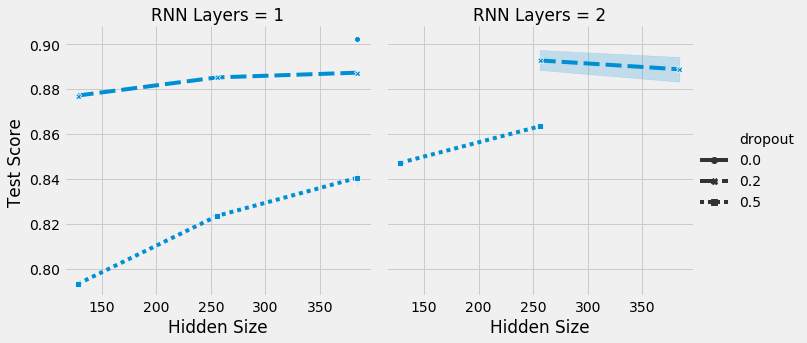

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import pickle



fs.get('data698-ner/spacy_ner/runs_df.pkl', 'runs_df.pkl')
import re
import pandas as pd
import seaborn as sns
import matplotlib.style as style

all_metrics = []
pattern = re.compile('([a-zA-Z_]+): (\d*\.?\d*)')

fs.get('data698-ner/spacy_ner/Paramselection.txt', 'Paramselection.txt')

with open('Paramselection.txt') as f:
    for line in f.readlines():
        eval_run_test = re.findall('evaluation run \d+', line)
        if eval_run_test:
            eval_run = eval_run_test[0]

        if re.search(pattern, line):
            metric_name = re.search(pattern, line).group(1)
            metric_value = re.search(pattern, line).group(2)
            
            if len(metric_value) > 0 and len(metric_name) > 0:
                all_metrics.append({metric_name : float(metric_value), 'run': eval_run})
            
        
runs_df = pd.DataFrame(all_metrics)


runs_df_full = runs_df.groupby('run').fillna(method='backfill').dropna() #make it one row per run
runs_df_full['rnn_layers'] = runs_df_full['rnn_layers'].astype(int)
runs_df_full = runs_df_full.rename(columns={'rnn_layers': 'RNN Layers'})


CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 70%;
}
"""

display(HTML(CSS))

style.use('fivethirtyeight')
ax = sns.relplot(x='hidden_size', y='test_score', col='RNN Layers',
           markers=True, kind='line', data=runs_df_full, style='dropout')
ax = ax.set_axis_labels('Hidden Size','Test Score')

### 6.3 Flair Embedding Tuning

The next decision point was the final choice of embedding type. We kept the same optimized hyperparameters, determined in the above step, for testing each embedding layer. This was an acceptable compromise because testing each embeddings layer with each set of hyperparameters would have required four times as many training runs. Furthermore, the output vectors of BERT, Flair, and ELMo embeddings are of similar dimension, so optimal model complexity and dropout were likely to be similar. 


All character-level embeddings exhibited similar performance, outperforming the subword-level Bert. One possible explanation was that the richer context awareness BERT provides was offset by many skills being rare words that are initialized in the BERT stack as unknown tokens. With the fewest parameters and best performance, we decided on the standard Flair embeddings to train our final model.


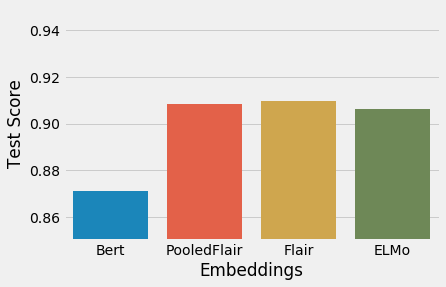

In [10]:
all_metrics = []
pattern = re.compile('([a-zA-Z_]+): ([a-zA-Z]*\d*\.?\d*)')

fs.get('data698-ner/spacy_ner/embedding_selection.txt', 'embedding_selection.txt')

with open('embedding_selection.txt') as f:
    for line in f.readlines():
        eval_run_test = re.findall('evaluation run \d+', line)
        if eval_run_test:
            eval_run = eval_run_test[0]

        if re.search(pattern, line):
            metric_name = re.search(pattern, line).group(1)
            metric_value = re.search(pattern, line).group(2)
            
            if len(metric_value) > 0 and len(metric_name) > 0:
                if metric_name in ['embeddings', 'use_crf']:
                
                     all_metrics.append({metric_name : metric_value, 'run': eval_run})
                else: 
                    all_metrics.append({metric_name : float(metric_value), 'run': eval_run})
                    
runs_df = pd.DataFrame(all_metrics)


runs_df_full = runs_df.groupby('run').fillna(method='backfill').dropna() #make it one row per run

CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 70%;
}
"""

display(HTML(CSS))

ax = sns.barplot(x='embeddings', y='test_score', data=runs_df_full)
ax.set(ylim=(.85,.95))
ax = ax.set(xlabel='Embeddings', ylabel='Test Score')

### 6.4 Categorization

Choosing the optimal number of clusters was a qualitative trial and error process. We started at 15 and added increments of 5 until major competing technologies, such as AWS and Azure, were separated. This was intended to mirror the way a business user might look at the skills market: focus on specific prominent technologies, while grouping smaller, but related skills together. Homing in on specific high-value targets follows the pareto principle used by the sales and marketing arm of many organizations (Lavinsky, 2014).

We used two of the qualitive measures outlined by Tchalian & Alsudais (2018) to assess the quality of our categorization methods.  Our top five skills in each category were chosen by count for K-Means, and by salience measure for LDA. To compute the coherent clusters measure, if at least three of those five skills were related, the cluster was deemed valid.

Salience measure was defined as the weighted average of global word probability and within-topic word probability. We used .5 for each weight. (pyLDAvis, 2019).

**K-Means Skill Categorization:**

In [11]:
import pandas as pd

from IPython.display import display, HTML

CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""

display(HTML(CSS))

fs.get('data698-ner/spacy_ner/km_pivot.csv', 'km_pivot.csv')
km_pivot = pd.read_csv('km_pivot.csv')
""" 
fs.get('data698-ner/spacy_ner/ner/km_clusters.pkl', 'km_clusters.pkl')
with open ('km_clusters.pkl', 'rb') as f:
    km_clusters = pickle.load(f)


km_clusters['skillno'] = km_clusters.groupby('cluster').cumcount()
km_clusters['colname'] = km_clusters['skillno'].map(lambda x: x+1)
km_clusters = km_clusters.loc[km_clusters.skillno <=4]

km_pivot = km_clusters.pivot(index='colname', columns='cluster', values='skill').transpose().reset_index()
km_pivot.columns = ['Skill ' + str(s_index) for s_index in km_pivot.columns]
""" 
cols = km_pivot.columns
columns = list(zip(['KMeans Cateogries'] * len(cols), cols))             
columns = pd.MultiIndex.from_tuples(columns)
km_pivot.columns = columns
display(HTML(km_pivot.to_html(index=False)))
#display(Latex(km_pivot.to_latex(index=False)))

**LDA Skill Categorization:**

In [12]:
fs.get('data698-ner/spacy_ner/lda_pivot.csv', 'lda_pivot.csv')
lda_pivot = pd.read_csv('lda_pivot.csv')
lda_pivot = lda_pivot.rename(columns={'LDA Topic Index': 'LDA Topic'})

CSS = """
<style>
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""

display(HTML(CSS))

""" 
from pymongo import MongoClient

connection = MongoClient('ds145952.mlab.com', 45952, retryWrites = False)
db = connection['capstone']
db.authenticate('cuny', 'datasci3nce')

rows = [] 
iterator = db.pivot_words.find()
for item in iterator:
    rows.append(item)
    
lda_pivot = pd.DataFrame(rows).drop(['_id', 'Skill percentage'], axis=1).sort_values(by='Skill top_num')
lda_pivot = lda_pivot.rename(columns={'Skill top_num': 'LDA Topic'})
"""
cols = lda_pivot.columns
columns = list(zip(['LDA Cateogries'] * len(cols), cols))             
columns = pd.MultiIndex.from_tuples(columns)
lda_pivot.columns = columns
display(HTML(lda_pivot.to_html(index=False)))
#display(HTML(lda_pivot.to_html(index=False)))

**Evaluation Summary**

| Model | Metric | Score |
| --- | --- | --- |
| K-Means | Coherent Clusters | 64% |
| K-Means | Coherence | 60% |
| LDA | Coherent Clusters | 88% |
| LDA | Coherence | 79% |

## 7 Results

Our final product, a Plotly Dash application, was able to provide a coherent, high-level view of the IT skills market. 

Below are the Application's components:


| Component | Tab | Description |
| --- | --- |----- |
| Topic Explorer | Overview | Relative similarity and overall volume of categories |
| Word Relevance Graph | Overview | Member skills of each category |
| Company Breakdown Graph | Overview | Volume by staffing company of the given category |
| Competitor Selector | Overview | Filter the topic explorer by staffing company |
| Cascaded Dropdowns | Search | Filter job listings by category, skill, and job title (cascading) |
| Job Listing Breakdown | Search | Breakdown of the job listing by category |
| Raw Job Listing | Search | View raw job listing |
| Job Listing Skills | Search | View all skills present in job listing |

*General Usage Notes*

- "Topic" and category are synonymous. 
- Categories are named by the most salient word in each given category


**Application "Overview" Tab**

*Usage Notes:*

- Categories are named by the skill with the highest word relevance score.
- Hovering over a Topic Explorer bubble will display the category name. Use this feature to get a summary-level view.
- Clicking on a bubble in Topic Explorer will crossfilter the Company Breakdown and Word Relevance graphs. Use this feature to drill down on specific skillsets.
- Selecting a company from the Competitor Selector will filter the Topic Explorer.


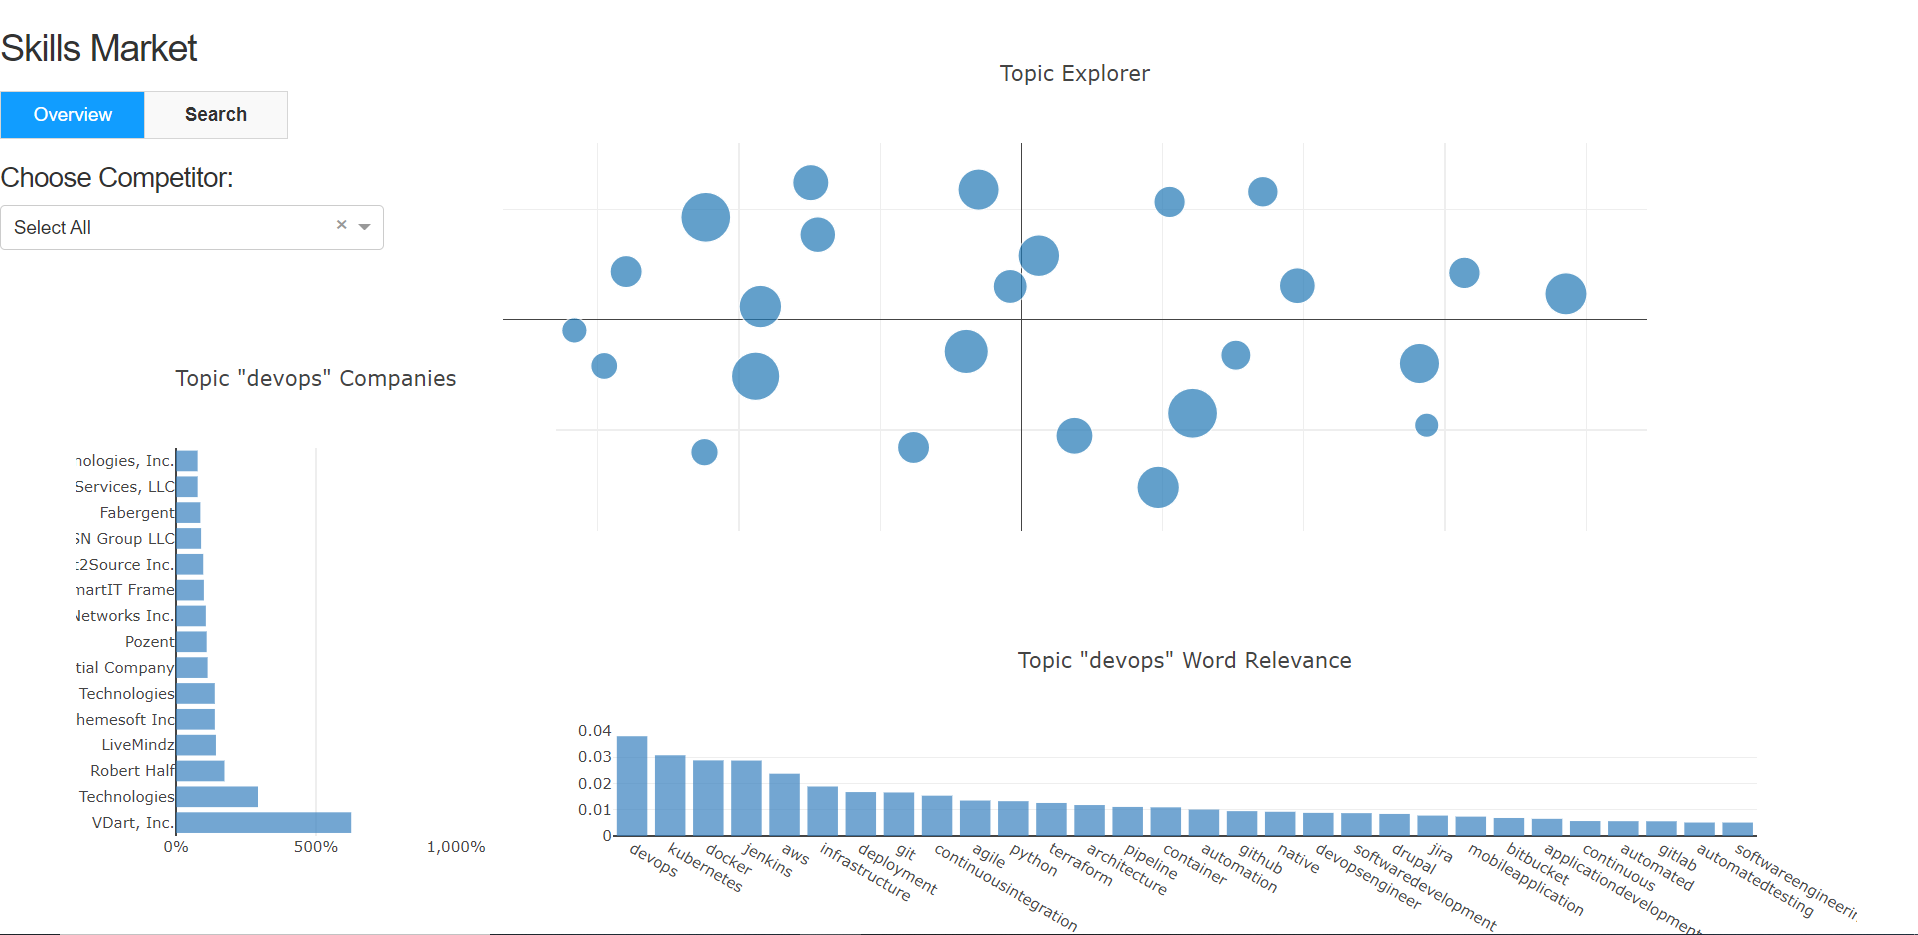

In [13]:
from IPython.display import Image

fs.get('data698-ner/spacy_ner/Overview.PNG', 'overview.png')
Image("overview.png")

**Application "Search" Tab**

*Usage Notes*

- The top drop down contains the categories. Selecting a category will display all skills appearing in a job listing where that category is present. This is not equivalent to displaying all skills in that category.
- The category filter plus the skill filter can be used to find specific job listings, such as "security" listings with "SQL" listed as a required skill.
- Clicking an item on the Job Listing Breakdown pie graph will embolden member skills of that category in the job listing.
- All skills present in the job listing are displayed to the left of the Job Listing Breakdown.


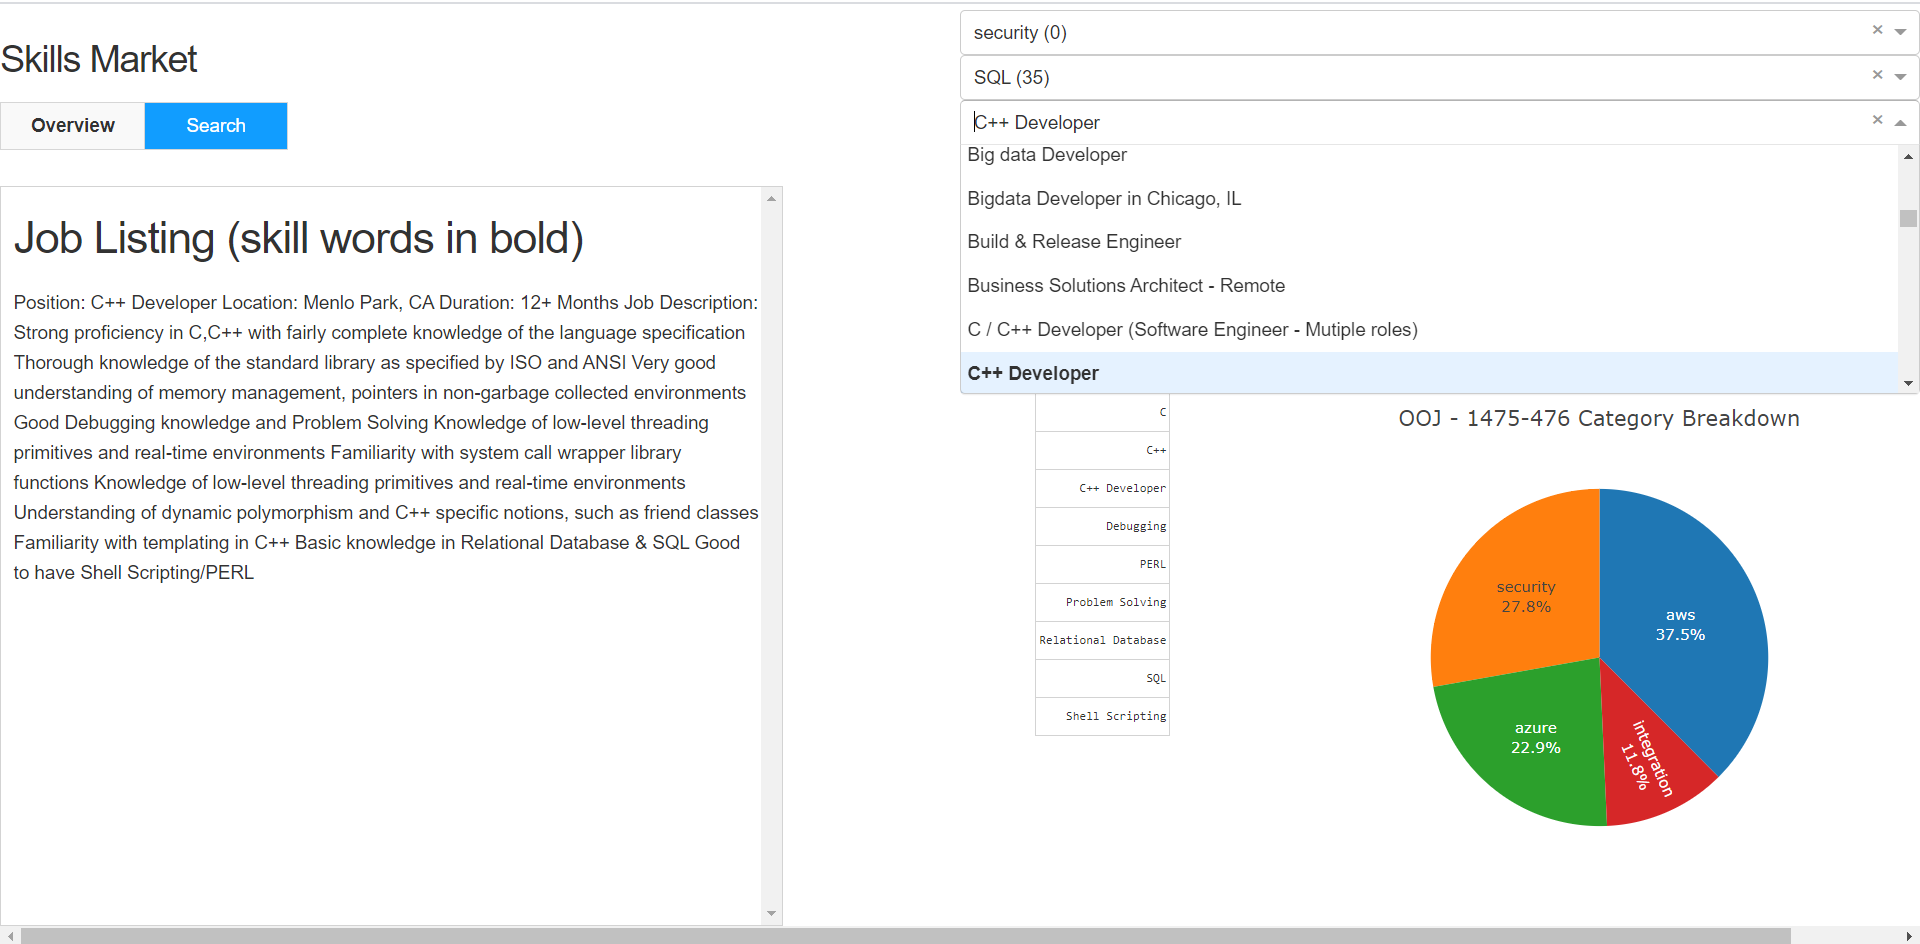

In [14]:
from IPython.display import Image

fs.get('data698-ner/spacy_ner/search.PNG', 'search.png')
Image("search.png")

## 8 Summary and Future Works

### 8.1 Summary

Within the visualization app, the Topic Explorer, in conjunction with other elements on the "Overview" tab, can be used to answer the question, "What is the overall makeup of the skills market in temporary IT staff augmentation?". 

One could study the member skills of each skill category, their relative volumes, and determine which competitors are staffing those skills. From a competitor-centric viewpoint, a user could filter the topic explorer by competitor and discover the chief categories that company is staffing. 

The second question, "On which skill segments should I have my group focus their sales and recruiting efforts?" could not be answered directly but could be answered with knowledge of one's own group. If a recruiting manager were to know which competitors were frequently taking their job listings, they could filter the Topic Explorer to locate that competitor's strengths. Additionally, given with knowledge of the group's skill focus, the Topic Explorer and Word Frequency graph allow a recruiting manager to find related technologies that could present growth opportunities.


### 8.2 Future Work

The version of our model stack presented in this paper could be considered a “beta version”. There are several optimizations available to each component needed to make the final product production-quality.

**Web Scraping**

Currently, our web scraper would not be able to match the pace at which dice listings are posted. Using several compute instances on GCP, we would be capable of scraping thousands of listings posted per day. 

Other sources, such as Indeed will also be incorporated. This will add some difficulty because job title will need to be added as a search parameter. Even with this narrowed search there is no assurance that all job listings will be in the IT domain.

**Skill Labeling**

Dice.com has a list of skills that could supplement our knowledge base. In our training dataset, a human should edit the labels we generated programmatically to ensure accuracy on our “train”, “dev” and “test” datasets. 

**NER Model**

There are several optimizations that should allow us to increase our F1 score. With fully accurate labeled datasets and additional budget, we will optimize hyperparameters over a larger grid. The idea that pooled Flair embeddings improve labelling of rare words is promising and we expect to conduct additional testing with these embeddings. Additionally, randomizing capitalizations is a technique used by spaCy in NER training that could reduce overfitting and overreliance on capitalization. 

**LDA Model/Categorization**

Increasing our job listing corpus from 2,200 to over 10,000 will increase the coherence of our topics and ensure the category mix is unbiased. Additionally, we will work with business partners to determine the optimal number of topics and manually generate category names. We also intend to explore clustering job listings by job title. Passing the title to a character-level embedding model, such as Flair's, should allow us to group together titles with small variations in spelling. Initial testing on this showed some problems related to the lack of standardization in Dice job titles.

**Visualization Tool**

Our interactive visualization will be migrated from Plotly Dash to Tableau. This will make it more adaptable and provide access to additional features.  Furthermore, it will make the tool accessible to our population of business users.


## References

Akbik, A., Bergmann, T., & Vollgraf, R. (2019). Pooled Contextualized Embeddings for Named Entity Recognition. *Annual Conference of the North American Chapter of the Association for Computational Linguistics, NAACL 2019*. Retrieved from https://alanakbik.github.io/papers/naacl2019_embeddings.pdf

Akbik, A., Blythe, D., & Vollgraf, R. (2018). Contextual String Embeddings for Sequence Labeling. *27th International Conference on Computational Linguistics, COLING 2018*. Retrieved from https://alanakbik.github.io/papers/coling2018.pdf

Devlin, J., Chang, M.W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805

Dice Skills Page (n.d.). Retrieved from https://www.dice.com/skills

Ethayarajh, K. (2019). How Contextual are Contextualized Word Representations? Comparing the Geometry of BERT, ELMo, and GPT-2 Embeddings. Retrieved from https://www.aclweb.org/anthology/D19-1006.pdf

Feng, Y. & Lapata, M. (2010). How Many Words is a Picture Worth? Automatic Caption Generation for News Images. Retrieved from https://www.aclweb.org/anthology/P10-1126.pdf

Globe Newswire (2019, April 26). *The US IT staffing market is expected to reach around $39 billion by 2024.* Retrieved from https://www.globenewswire.com/news-release/2019/10/08/1926648/0/en/The-US-IT-staffing-market-is-expected-to-reach-around-39-billion-by-2024.html

Lavinksy, D. (2014, Januaary 20). Pareto Principle: How To Use It To Dramatically Grow Your Business. *Forbes.com.* Retrieved from https://www.forbes.com/sites/davelavinsky/2014/01/20/pareto-principle-how-to-use-it-to-dramatically-grow-your-business/#112792363901

Lettier (2018, February 23). *Your Guide to Latent Dirichlet Allocation.* Medium.com. Retrieved from https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

Mikolov, T., Sutskever, I, Chen, K., Corrado, G., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. Retrieved from https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf

Peters, M.E., Neumann, M., Iyye, M., Gardner, M., Clark, C., Lee, K., & Zettlemoyer, L. (2018). Deep contextualized word representations. arXiv:1802.05365

pyLDAvis (2019). Retrieved from https://github.com/bmabey/pyLDAvis

Qiang, J. & Chen, P. (2016). Topic Modeling over Short Texts by Incorporating Word Embeddings. arXiv:1609.08496

spaCy (2017, Nov 20). SPACY'S ENTITY RECOGNITION MODEL: incremental parsing with Bloom embeddings & residual CNNs. Retrieved from https://spacy.io/universe/project/video-spacys-ner-model

Tarcar, A.K., Tiwari, A., Rao, D., Dhaimodker, V.N., Rebelo, P., & Desai, R. (2019). Healthcare NER Models Using Language Model Pretraining. arXiv:1910.11241

Tchalian, H. & Alsudais, A. (2019). Clustering Prominent Named Entities in Topic-Specific Text Corpora. arXiv:1807.10800

## Appendix